Import Libraries




In [1]:
import tensorflow as tf;
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;



Load in Data

In [2]:
minst = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = minst.load_data()
x_train, x_test = x_train / 255.0, x_test /255.0
print("x_train.shape : ", x_train.shape)

11490434/11490434 [==============================] - 0s 0us/step
x_train.shape :  (60000, 28, 28)


In [3]:
#Build in the Model:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [4]:
#Compile the Model:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [5]:
#Train model:
r = model.fit(x_train, y_train, validation_data=(x_test,y_test),epochs=20)

Epoch 1/20
1875/1875 [==============================] - 13s 6ms/step - loss: 0.2957 - accuracy: 0.9151 - val_loss: 0.1364 - val_accuracy: 0.9617
Epoch 2/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1387 - accuracy: 0.9593 - val_loss: 0.1020 - val_accuracy: 0.9708
Epoch 3/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1049 - accuracy: 0.9678 - val_loss: 0.0837 - val_accuracy: 0.9749
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0861 - accuracy: 0.9740 - val_loss: 0.0779 - val_accuracy: 0.9758
Epoch 5/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0727 - accuracy: 0.9776 - val_loss: 0.0743 - val_accuracy: 0.9782
Epoch 6/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0645 - accuracy: 0.9793 - val_loss: 0.0728 - val_accuracy: 0.9780
Epoch 7/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0573 - accuracy: 0.9822 - val_loss: 0.0720 - val_acc

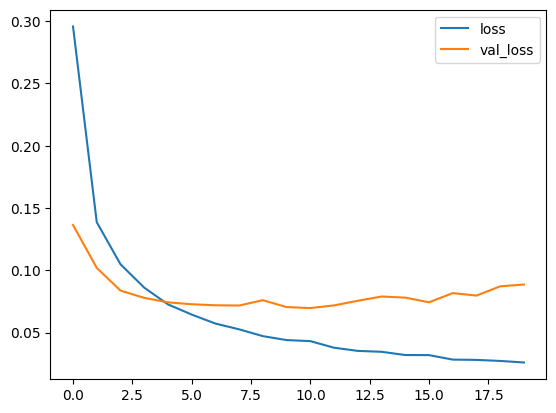

In [7]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

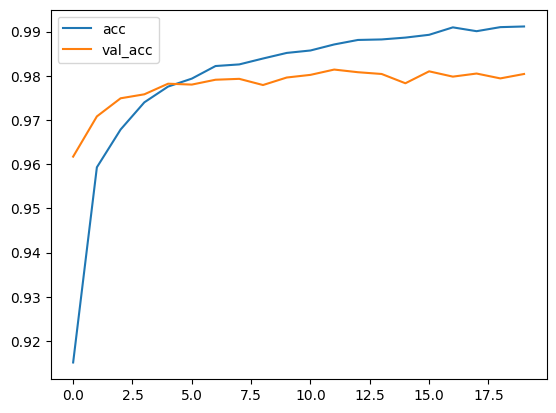

In [8]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend();

In [9]:
#Evaluate The Model:
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 1s 4ms/step - loss: 0.0886 - accuracy: 0.9804
[0.0886373221874237, 0.980400025844574]


313/313 [==============================] - 1s 2ms/step
=================== wthout Normalized Confusion Matrix
[[ 970    1    2    0    2    0    2    1    2    0]
 [   0 1126    3    0    0    0    2    1    3    0]
 [   4    5 1004    2    1    0    0    8    7    1]
 [   0    0    3  988    0    2    0    6    3    8]
 [   0    0    2    0  965    0    4    3    2    6]
 [   2    1    0   11    2  869    1    2    2    2]
 [   2    2    0    1    3    7  940    0    3    0]
 [   0    4    7    1    0    0    0 1010    1    5]
 [   1    0    3    4    5    5    0    7  946    3]
 [   1    2    0    6    4    3    0    7    0  986]]


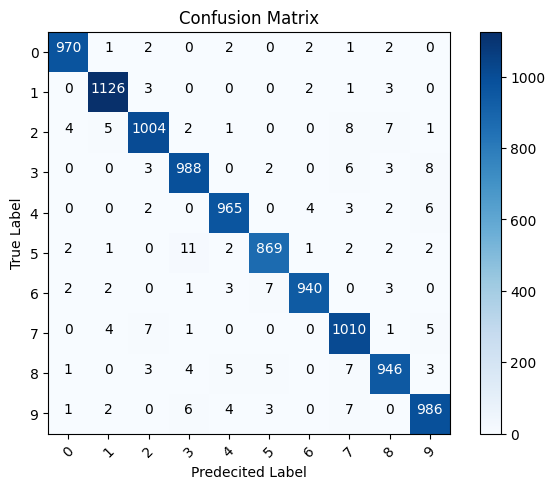

In [10]:
from keras.layers.preprocessing.image_preprocessing import HORIZONTAL
from traitlets import config
# Plotting Confusion Matrix:

from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues) :
  """
    This Funciton prints and plots confusion matrix, Normalization could be
    applied by settings normalize=True
  """

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('=================== Normalized Confusion Matrix')
  else:
    print('=================== wthout Normalized Confusion Matrix')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j,i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i,j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predecited Label')


  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))


# Show Misclassified Samples:

Text(0.5, 1.0, 'True Label : 1, Predicted : 2')

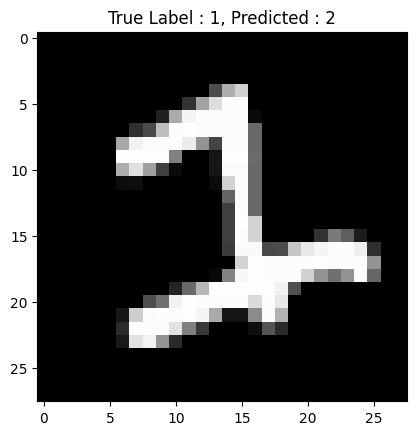

In [18]:
missclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(missclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True Label : %s, Predicted : %s" % (y_test[i], p_test[i]))